In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [510]:
train=pd.read_csv('train.csv')
y=train['Survived']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [511]:
print(train.shape)

print(train.columns)
print(train.isnull().sum())
print(train.dtypes)

print(train.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [512]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [513]:
print(test.shape)

print(test.columns)
print(test.isnull().sum())
print(test.dtypes)

passenger_id= test['PassengerId']

data_combined=train.append(test)


(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [514]:
train.set_index(['PassengerId'] , inplace=True)
test.set_index(['PassengerId'] , inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


10 features

Numerical features = Age, Fare,SibSp, Parch

Categorical features - Pclass ,Sex , Embarked

Alphanumeric features - Ticket, Cabin

Text - Name


# Cleaning data features

<AxesSubplot:>

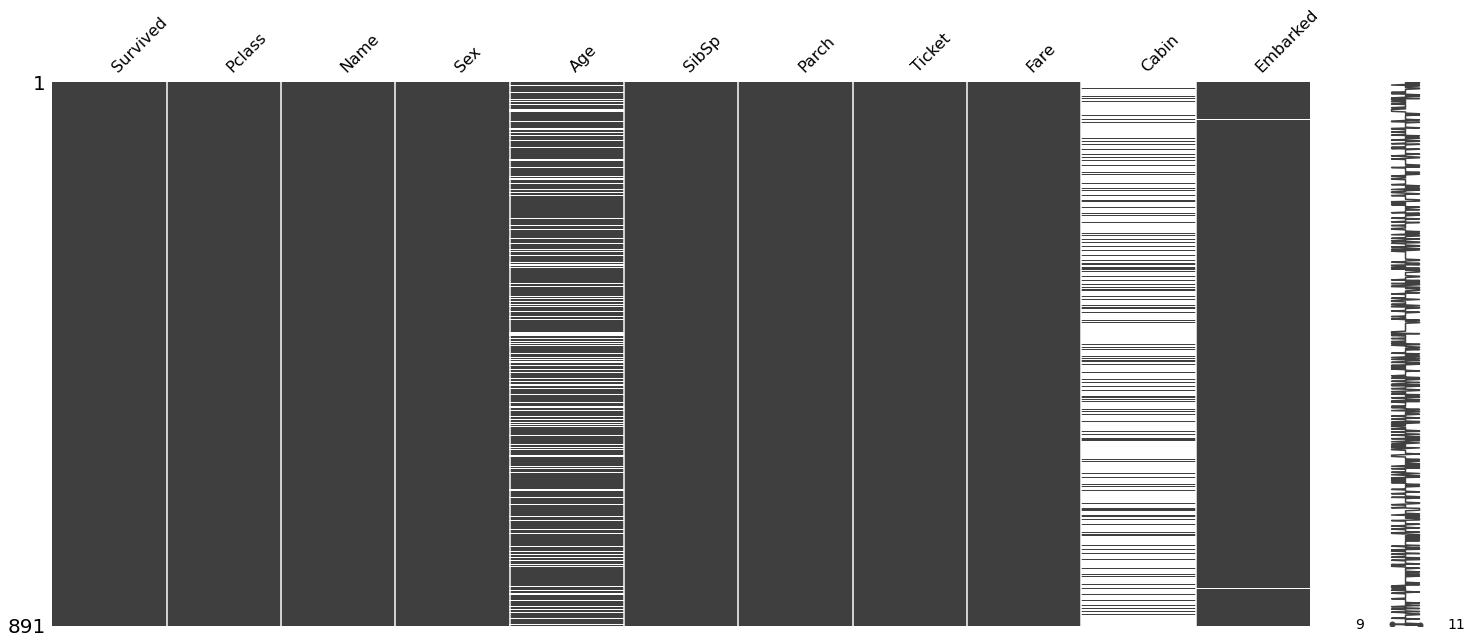

In [515]:
import missingno as mn
mn.matrix(train)


# Fill in missing values

In [516]:
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy='mean')

imp_train=imp.fit_transform(train[['Age']])

train['Age2']=imp_train

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [517]:
imp_test=imp.fit_transform(test[['Age']])
test['Age2']=imp_test
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [518]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [519]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age2          0
dtype: int64

In [520]:
train.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [521]:
train['Embarked'].fillna('S',inplace=True)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age2          0
dtype: int64

In [522]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Age2          0
dtype: int64

In [523]:
train.drop(columns=['Age','Cabin'],inplace=True)
test.drop(columns=['Age','Cabin'],inplace=True)

print(train.columns)

print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age2'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'Age2'],
      dtype='object')


In [524]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [525]:
OH_sex=pd.get_dummies(train['Sex'])


In [526]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [527]:
OH_train=pd.concat([train,OH_sex],axis=1)
OH_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,female,male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,1,0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,0,1


In [528]:
OH_sex_test=pd.get_dummies(test['Sex'])

In [529]:
OH_test=pd.concat([test,OH_sex_test],axis=1)
OH_test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,female,male
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0,1,0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0,0,1
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0,1,0


In [530]:
print(OH_train.columns)
print(OH_test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age2', 'female', 'male'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'Age2', 'female', 'male'],
      dtype='object')


In [531]:
OH_embarked= pd.get_dummies(OH_train['Embarked'])
OH_embarked.head()



,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [532]:
OH_train.drop(columns=['Sex','Ticket','Embarked','Name'], inplace=True)


In [533]:
final_OH_train=pd.concat([OH_train,OH_embarked],axis=1)
final_OH_train.columns

print(final_OH_train.shape)

(891, 11)


In [534]:
OH_embarked_test= pd.get_dummies(OH_test['Embarked'])
OH_embarked_test.head()
print(OH_embarked_test.shape)


(418, 3)


In [535]:
OH_test.drop(columns=['Sex','Ticket','Embarked','Name'], inplace=True)

In [536]:
final_OH_test=pd.concat([OH_test,OH_embarked_test],axis=1)
final_OH_test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Age2', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [537]:
print(final_OH_train.shape)
print(final_OH_test.shape)

(891, 11)
(418, 10)


# Detecting outliers


(891, 11)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

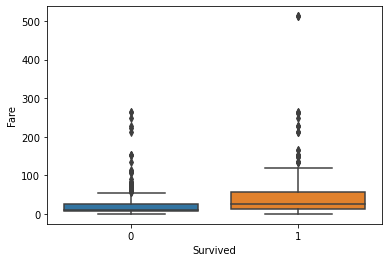

In [538]:
print(final_OH_train.shape)

import seaborn as sns
sns.boxplot(x='Survived', y='Fare', data=final_OH_train)

In [539]:
print(final_OH_train.shape)

#final_OH_train=final_OH_train[final_OH_train['Fare']<=400] #removing fare outliers

#y=final_OH_train['Survived']

print(final_OH_train.shape)

print(final_OH_train.isnull().sum())

(891, 11)
(891, 11)
Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
Age2        0
female      0
male        0
C           0
Q           0
S           0
dtype: int64


# General Data analysis


In [540]:
final_OH_train.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,Age2,female,male,C,Q,S
Survived,,,,,,,,,,
0,2.531876,0.553734,0.329690,22.117887,30.415100,0.147541,0.852459,0.136612,0.085610,0.777778
1,1.950292,0.473684,0.464912,48.395408,28.549778,0.681287,0.318713,0.271930,0.087719,0.640351


# Correlation matrix

In [541]:
final_OH_train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,female,male,C,Q,S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.069809,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.331339,-0.131900,0.131900,-0.243292,0.221009,0.074053
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.232625,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.179191,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.091566,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Age2,-0.069809,-0.331339,-0.232625,-0.179191,0.091566,1.000000,-0.084153,0.084153,0.032024,-0.013855,-0.019336
female,0.543351,-0.131900,0.114631,0.245489,0.182333,-0.084153,1.000000,-1.000000,0.082853,0.074115,-0.119224
male,-0.543351,0.131900,-0.114631,-0.245489,-0.182333,0.084153,-1.000000,1.000000,-0.082853,-0.074115,0.119224
C,0.168240,-0.243292,-0.059528,-0.011069,0.269335,0.032024,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.026354,-0.081228,-0.117216,-0.013855,0.074115,-0.074115,-0.148258,1.000000,-0.499421


<AxesSubplot:>

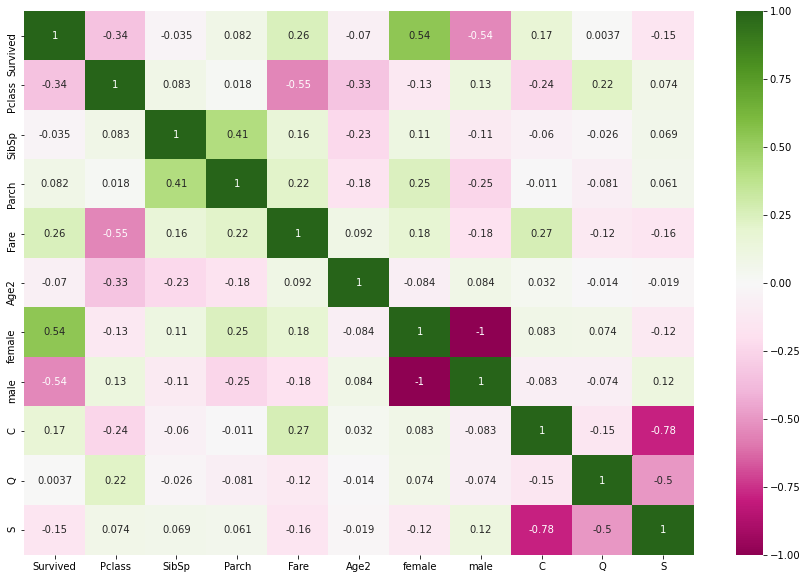

In [542]:
plt.subplots(figsize=(15,10))

sns.heatmap(final_OH_train.corr(),annot=True,cmap='PiYG')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

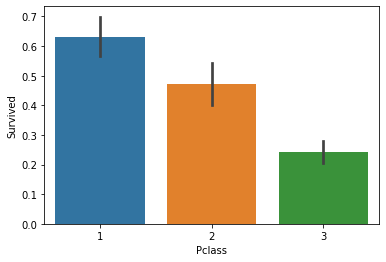

In [543]:
sns.barplot(x='Pclass',y='Survived',data=final_OH_train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

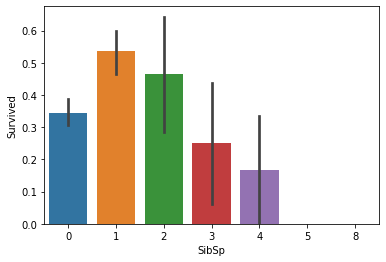

In [544]:
sns.barplot(x='SibSp',y='Survived',data=final_OH_train)

In [545]:
final_OH_train.shape

(891, 11)

In [546]:
final_OH_test.shape

(418, 10)

# training model


In [547]:
print(final_OH_train.columns)

final_OH_train.drop(columns=['Survived'],inplace=True)


from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(final_OH_train, y, train_size=0.8, test_size=0.2,random_state=0)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age2', 'female',
       'male', 'C', 'Q', 'S'],
      dtype='object')


# Training using randomForestClassifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=max_leaf_nodes, max_depth=11, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


leaf_nodes=[25,50,100,200,300,500,1000,1500,2000,3000]

for i in leaf_nodes:
    mae=get_mae(i,X_train,X_valid,y_train,y_valid)
    print(" current value of node : %d\t\t mae: %f"%(i,mae))




NameError: name 'RandomForestRegressor' is not defined

In [549]:
model = RandomForestClassifier(n_estimators=300, max_depth=11, random_state=1)
model.fit(X_train, y_train)
preds=model.predict(X_valid)


from sklearn.metrics import classification_report

matrix=classification_report(y_valid,preds)

print(matrix)

predictions=model.predict(final_OH_test)





              precision    recall  f1-score   support

           0       0.85      0.94      0.89       110
           1       0.88      0.74      0.80        69

    accuracy                           0.86       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



# Training using decisionTreeClassfier

In [550]:
from sklearn.tree import DecisionTreeClassifier

dec=DecisionTreeClassifier(criterion='entropy',max_depth=12)

dec.fit(X_train, y_train)

pred2=dec.predict(X_valid)

matrix2=classification_report(y_valid,pred2)

print(matrix2)

   

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



# Training using LogisticRegression


In [551]:
from sklearn.linear_model import LogisticRegression

model2=LogisticRegression(random_state=0)
model2.fit(X_train, y_train)
preds2=model2.predict(X_valid)

matrix2=classification_report(y_valid,preds2)

print(matrix2)


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



c:\users\andyg\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
